<a href="https://colab.research.google.com/github/jlifferth/UQ-BIO-2022/blob/main/Tutorial_4_2_%E2%80%93_Python_Tutorial_for_Model_Optimization_and_Data_Fitting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# What is a likelihood?
So far in the course, we have learned a bit about probabilistic modeling, starting with basic probability distributions ([![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ekc4tqg3KNGF3rgeD_P1fXcTGiZVcCyo?usp=sharing)) and earlier this week modeling using the chemical master equation ([![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Y_Jg0O9Ew-XKzB7Hxnp0o0fg-qOYBHn1?usp=sharing#scrollTo=9tRHzxmWsMhg)). 

Many of you are _likely_ (hem, hem) to have seen things like maximum likelihood estimation, and may even be familiar with Bayesian analysis, but let's start at the very beginning, and try to answer the question **what is a likelihood?**


It turns out that, in the most simple sense, a likelihood is a probability of an event. An "event" is normally the thing that we measure, and we typically assume that the even is drawn from our probabilistic model. 

### Coin flips
Let's start with a simple example of flipping an unfair coin. _From previous lecture_: the Bernoulli distribution is used to model a binary reponse $Y$ that, without loss of generality, we assume to be either $0$ or $1$. Its probability mass function is given by
$$
p\left(y ; \theta\right)
=
\begin{cases}
1-\theta \;\;\text{if }y=0\\
\theta \;\;\text{if }y=1
\end{cases}
$$
Let's call this our forward probabilistic model - you put in a parameter value (the probability of heads, $\theta$) and you get out the (trivial) probability distribution above.

Now, let's move back to the physical world. You have a coin, you flip it 5 times, and you get `[H, H, H, T, H]`. Now, you want to evaluate if coin is fair - or more precisely, you want to know what is the probability of 4 heads and 1 tails. It should be obvious that the probability of 4 heads and 1 tails depends on how fair the coin is - in other words, on the value of $\theta$. Intuitively, what is the value of $\theta$ that maximizes the probability (likelihood) of these measurements? 

Now, let's formalize what just happened. We took a probabilistic model for coin flips, and then we noted that the order of the flips didn't matter - we assumed that each flip was independent of the others, and therefore we can in some sense reduce the time-series `[H, H, H, T, H]` to just 4 heads and 1 tails. If we write the probability of this explicitly, we have the product of five Bernoulli random variables, which is to say that we have single probability of this dataset $\mathcal{D}$ which is given by
$$
p(\mathcal{D}) = p(y=1;\theta)\times p(y=1;\theta) \times p(y=1;\theta) \times p(y=0; \theta) \times p(y=1; \theta) \\ 
= p(y=1;\theta)^4 p(y=0; \theta) \\ 
= \theta^4 (1-\theta)
$$
This is the probability of this data. In general, if we have done $n$ coin flips, and $k$ of them were heads, we have 
$$
p(\mathcal{D};\theta) = \theta^{k} (1-\theta)^{n-k}
$$
(This looks like something! What is the difference between $p(\mathcal{D})$ and a binomial random variable?)

Now, for any $\theta$ we can compute the likelihood of that data, and $p(\mathcal{D};\theta)$ is a function that tells us the probability of the data for any $\theta$. Let's plot the likelihood as a function of $\theta$. 




The value of theta which maximizes the likelihood is 0.23002300230023004


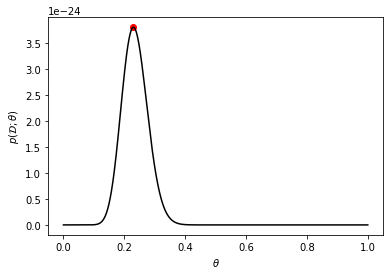

In [2]:
import numpy as np
import matplotlib.pyplot as plt

thetas = np.linspace(0,1,10000)
k = 23
n = 100
likelihoods = (thetas**k)*(1-thetas)**(n-k)
f,ax = plt.subplots()
ax.plot(thetas,likelihoods,color='k')
ax.scatter(thetas[np.argmax(likelihoods)], likelihoods[np.argmax(likelihoods)],c='r')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$p(\mathcal{D};\theta)$')
print('The value of theta which maximizes the likelihood is {0}'.format(thetas[np.argmax(likelihoods)]))

### Gaussian random variables
Now, let's get a _little_ more abstract. Suppose that we have drawn $N$ independent samples from what we think is univariate Gaussian or normal distribution, $\mathcal{D} = \{ x_1, x_2, ..., x_N \}$. In our statistics lecture we learned that a Gaussian is distributed as
$$
p(x;\theta) = \frac{
    1
}{
    \sqrt{2\pi\sigma^2}
}\exp\left(-\frac{
    1
}{
    2
}\left(\frac{
    x-\theta
}{
    \sigma
}\right)^2\right).
$$
where I've replaced $\mu$ with $\theta$ to emphasize that $mu$ is the thing we don't know, and would like to learn from the data (for simplicity let's assume for whatever reason we know $\sigma$...).


Because we are assuming that we have independent samples, the likelihood of the data $\mathcal{D}$ is going to be the product of the probabilities of each data point. In general, for independent samples/rv's, we have that the joint probability distribution is the product of the probability of each independent event, i.e.
$$
p(\mathcal{D} = \{ x_1,x_2,\dots,x_N \};\theta) = \prod_{i=1}^N p(x=x_i;\theta).
$$
For our Gaussian probability, we therefore have the following:
$$
p(\mathcal{D};\theta) = 
\prod_{i=1}^N
\frac{
    1
}{
    \sqrt{2\pi\sigma^2}
}\exp\left(-\frac{
    1
}{
    2
}\left(\frac{
    x_i-\theta
}{
    \sigma
}\right)^2\right).
$$
Because the likelihood is just multiplying together a bunch of small numbers usually less than 1, it can get small fast; for this reason, we almost always work with the log-likelihood. Because a logarithm is a monotonic function, we know that the $\theta$ that maximizes the likelihood should also minimize the negative of the log-likelihood. This also happens to greatly simplify things for the Gaussian:
$$
\log p(\mathcal{D};\theta) = 
- \frac{1}{2}\log 2\pi\sigma^2 - \sum_{i=1}^N
\frac{
    1
}{
    2
}\left(\frac{
    x_i-\theta
}{
    \sigma
}\right)^2.
$$


the theta that maximizes the log-likelihood is 99.74974974974975
the theta that generated the data is 100
the average of the data is: 99.73288656882401


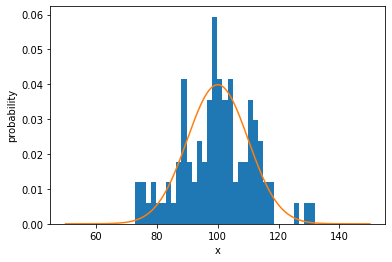

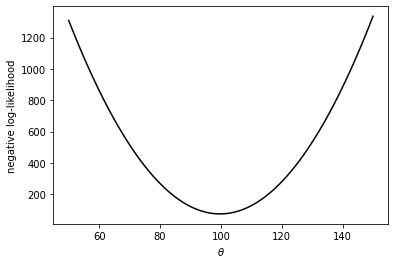

In [3]:
def get_gaussian_loglikelihood(data, mu, sigma):
  return -0.5 *np.log(2*np.pi*sigma**2) - np.sum(.5*((data-mu)/sigma)**2)

def gaussian(xtest, mu, sigma):
  return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-.5*(xtest-mu)**2/sigma**2)

# generate some sample data 
mu_true = 100
sigma = 10
n_samples = 100
data = mu_true+sigma*np.random.randn(n_samples)

# plot the data
f,ax = plt.subplots()
ax.hist(data, bins=35, density=True)
ax.set_xlabel('x')
ax.set_ylabel('probability')

# plot the true gaussian
xtest = np.linspace(50,150,10000)
ax.plot(xtest, gaussian(xtest, mu_true, sigma))

# get the likelihood for different values of theta
thetas = np.linspace(50,150,1000)
all_loglikelihoods = []
for theta in thetas:
  all_loglikelihoods.append(get_gaussian_loglikelihood(data, theta, sigma))


f,ax = plt.subplots()
ax.plot(thetas, -1*np.array(all_loglikelihoods),'k')
#ax.scatter(thetas[np.argmax(all_loglikelihoods)],all_loglikelihoods[np.argmax(all_loglikelihoods)],c='r')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'negative log-likelihood')

print('the theta that maximizes the log-likelihood is {0}'.format(thetas[np.argmax(all_loglikelihoods)]))
print('the theta that generated the data is {0}'.format(mu_true))

print('the average of the data is: {0}'.format(np.mean(data)))


### Likelihood for smFISH data and CME models

Now that we have developed some background "feel" for what a likelihood is and how we compute it for a couple of different probabilistic models, let's turn to single-cell data, like smFISH data for which our probabilistic model is the chemical master equation. Remember that smFISH data comes from counting individual RNA in single cells at some time $t$. Therefore, our data set $\mathcal{D}$ is very similar to the coin flip data that we saw above! Except instead of flipping a two-sided coin, the number of RNA is like rolling an $N$ sided die, where the $N$ is the number of RNA we have in our model, which we'll call $x$. We therefore need the probability for _each_ $x$, which is just $p(x=x_i;\theta)$. **Where does $p(x=x_i; \theta)$ come from? What is $\theta$?**

Now suppose we have a data set which is ordered as $\mathcal{D} = \{ m_1, m_2, ..., m_{N_c} \}$, where $m$ is the number of RNA we counted in the $i^{th}$ cell. Just like our coin flips, we assume that each measurement is independent, so the likelihood is 
$$
p(\mathcal{D};\theta) = \prod_{i=1}^{N_c} p(x=m_i;\theta).
$$
However, we can bin the measurements just like we did for the coin flips, and make a new, but equivalent data vector $\mathcal{D}=\{ d_0,d_1, d_2,...,d_N \}$, where $d_i$ is the number of cells with $x_i$ mRNA. Therefore, instead of taking the product over the full measurement space, we can take the product over the state space, i.e. 
$$
p(\mathcal{D};\theta) = \prod_{i=0}^N p(x=x_i; \theta)^{d_i}
$$
As before, it is better to work with the logarithm of this value, 
$$
\log p(\mathcal{D};\theta) = \sum_{i=0}^N d_i \log p(x=x_i; \theta).
$$
Here, the value of $p(x)$ comes from the solution to the chemical master equation, normally using the FSP. So we can now find the likelihood of smFISH data (for a single time point). $\theta$ is the set of kinetic parameters that then maps to the FSP solution. We've used this likelihood function extensively, see [here](http://www.pnas.org/content/early/2018/06/28/1804060115.short), [here](https://science.sciencemag.org/content/339/6119/584.abstract), and [here](https://aip.scitation.org/doi/full/10.1063/1.4960505). Let's play around with this for a bit! 

In [4]:
%%capture
!wget --no-check-certificate 'https://github.com/MunskyGroup/uqbio2021/raw/main/module_4/expv.py' -r -A 'uc*' -e robots=off -nd -O 'expv.py'

In [5]:
import numpy as np
import scipy.sparse as sp
from expv import expv

def getA(k,g,N):
    return sp.spdiags([np.arange(N) * g,np.tile(kr,N),-np.arange(N)*g-np.tile(kr,N)],[1,-1,0],N,N) 

def solve_fsp(A, tvec, p0):
    '''
    solve the FSP.
    '''
    all_p = np.empty((A.shape[0],len(tvec)))
    pnow = np.copy(p0)
    all_p[:,0] = p0

    n=int(A.shape[0])
    m=30
    tol = 1e-8
    w = np.ones(n,dtype=np.float64)
    anorm = sp.linalg.onenormest(A)
    wsp = np.zeros(7+n*(m+2)+5*(m+2)*(m+2),dtype=np.float64)
    iwsp = np.zeros(m+2,dtype=np.int32)
    for i in range(1,len(tvec)):
      pnow,m,v = expv(tvec[i]-tvec[i-1],A,pnow,tol=1e-8,m=30)
      all_p[:,i] = pnow
    return all_p


# Function to randomly determine next time and next state using random number generation
# based on the current propensities (exponential waiting time)
def next_jump(W,X):
    current_propensities = W(X)
    total_reactions =current_propensities.shape[1]  # Get total number of reactions
    
    # Update time of next reaction (where tau = 1/w0*log(1/rand)
    time_next_rxn = -np.log(np.random.rand()) / np.sum(current_propensities)

    # Generate random number to select the new reaction to happen based on current state
    random_rate = np.random.rand() * np.sum(current_propensities)

    # Select the new reaction to happen based on current state
    cumulative_prop = np.cumsum(current_propensities)
    for i in range(total_reactions):
      if cumulative_prop[i] >= random_rate:
        rxn_id = i
        break
    return time_next_rxn,rxn_id  ##Return these back out

def SSA_traj(S, W, x0, time_vector):
    total_states = S.shape[0]     # Get total states (number of species)
    x = x0  # Set the state to initial state
    t = time_vector[0]  # Initial time - 1st time in time_vector
    tstop = time_vector[-1]  # Stop time - Last time in time_vector
    record_index = 0  # Initialize counter
    Nt = len(time_vector)  # Total number of time points
    traj_data = np.zeros((total_states, Nt)) # Preallocate for efficiency
    
    while t < tstop:  # While time is less than last time point
  
        time_next_rxn,rxn_id = next_jump(W,x)  # Run function to get next time and next reaction
        t += time_next_rxn

        while t >= time_vector[record_index]:  # If time passed the record vector, record the state
            traj_data[:, record_index] = x
            record_index += 1   # Update the counter
            if time_vector[record_index] == tstop:  # If counter has moved past the final time point, end and return the data
                traj_data[:, record_index] = x
                return traj_data

        x = x + S[:, rxn_id]  # Update the state based on last reaction
    return traj_data

In [6]:
# example solution
S = np.array([[1],
              [-1]]).T
W = lambda x: np.array([[kr,g*x[0]]])

kr = 10
g = 1

tvec = np.linspace(0,2,10)
ncells = 100
all_traj = []
for i in range(ncells):
  all_traj.append(SSA_traj(S,W,[0],tvec))
all_traj = np.array(all_traj)
data,_ = np.histogram(all_traj[:,0,-1],bins=np.arange(51))


# solve the FSP with the correct parameters to make sure they match
theta = [kr, g]
A = getA(theta[0],theta[1],50)
p0 = np.zeros(50)
p0[0] = 1
pfull = solve_fsp(A,tvec,p0)

Text(0, 0.5, '# molecules')

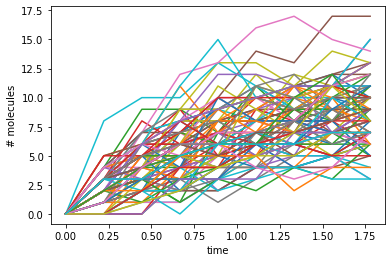

In [9]:
f,ax = plt.subplots()
_ = ax.plot(tvec[:-1],all_traj[:,0,:-1].T)
ax.set_xlabel('time')
ax.set_ylabel('# molecules')

Text(0, 0.5, '# probability ')

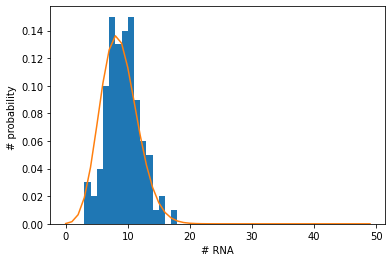

In [11]:
import matplotlib.pyplot as plt
f,ax = plt.subplots()
_ = ax.hist(all_traj[:,0,-1],bins=np.arange(50),label='data',density=True)
ax.plot(np.arange(50), pfull[:,-1])
# ax.step(np.arange(49)+1,data)
ax.set_xlabel('# RNA')
ax.set_ylabel('# probability ')

In [12]:
def get_loglikelihood(theta, data, N):
    A = getA(theta[0],theta[1],N)
    p0 = np.zeros(N)
    p0[0] = 1
    pfull = solve_fsp(A,tvec,p0)
    pfull_tmp = np.zeros((len(data),len(tvec)))
    pfull_tmp[:N,:] = pfull
    pos_p = pfull_tmp[:,-1]>0
    return np.dot(data[pos_p],np.log(pfull_tmp[pos_p,-1])), pfull_tmp

theta = [10,1] 
logl, pfull = get_loglikelihood(theta,data,50)


In [13]:
logl

-241.41346036991104

In [14]:
# let's just change the value of kr from 1 to 10 and look at the different likelihoods
krs = np.linspace(1,20,20)
gs = np.linspace(.5,1.5,20)
all_likelihoods = np.zeros((20,20))
for i,kr in enumerate(krs):
  for j,g in enumerate(gs):
    theta = [kr, g]
    logl, pfull = get_loglikelihood(theta,data,50)
    all_likelihoods[i,j] = logl



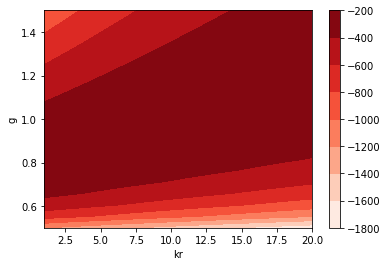

In [15]:
f,ax = plt.subplots()
cf = ax.contourf(krs,gs,all_likelihoods,cmap='Reds')
ax.set_xlabel('kr')
ax.set_ylabel('g')
f.colorbar(cf)

kr which maximizes likelihood is 13.0


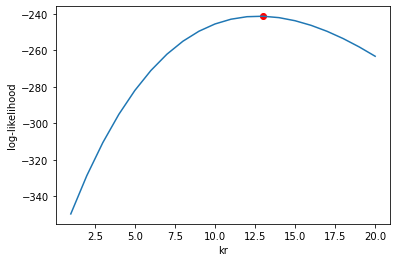

In [16]:
f,ax = plt.subplots()
ax.plot(krs, all_likelihoods[10,:])
ind = np.argmax(all_likelihoods[10,:])
ax.scatter(krs[ind],all_likelihoods[10,ind],c='r')
ax.set_xlabel('kr')
ax.set_ylabel('log-likelihood')
print('kr which maximizes likelihood is {0}'.format(krs[ind]))

A parameter sweep is effective when the number of parameters are few _and_ the likelihood is relatively cheap to evaluate computationally. However, often times we are not in this situation and we need to turn to optimization schemes that actively search for the model parameters that maximize the likelihood function. Now, let's use SciPy's built in optimization in [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) routines to find the maximum likelihood parameters for this model. This package has many general-purpose optimization algorithms, which in general try to find the minima of a given function $f(x)$ by iteratively evaluating $f$, either by following a gradient $\frac{df}{dx}$ or using heuristics, such as the simplex algorithm. Note that the main engine of machine learning optimization is variations on gradient descent called stochastic gradient descent. 

To learn a little about some common minimization algorithms, we will apply them to the simple FSP model above. 




In [17]:
from scipy.optimize import minimize

logl, pfull = get_loglikelihood(theta,data,50)

# Use a lambda function to create something that the scipy.optimize.minimize likes:
f = lambda theta: -1*get_loglikelihood(theta, data, 50)[0]

# Make a callback function to record the function values as the algorithm goes along
all_likelihoods = []
cback = lambda theta: all_likelihoods.append(get_loglikelihood(theta, data, 50)[0])
results = minimize(f, x0 = [12,2], method='Nelder-Mead', callback=cback) 


Text(0, 0.5, 'Likelihood')

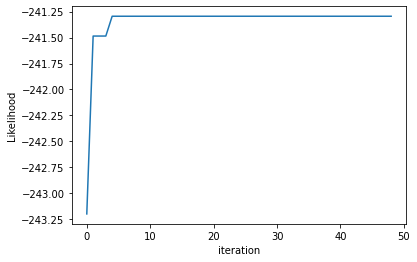

In [18]:
f,ax = plt.subplots()
ax.plot(np.arange(results.nit-1), all_likelihoods)
ax.set_xlabel('iteration')
ax.set_ylabel('Likelihood')

In [19]:
results

 final_simplex: (array([[10.19988484,  2.25003839],
       [10.1998116 ,  2.25003839],
       [10.19984822,  2.25003839]]), array([241.2952793, 241.2952793, 241.2952793]))
           fun: 241.29527929982407
       message: 'Optimization terminated successfully.'
          nfev: 121
           nit: 50
        status: 0
       success: True
             x: array([10.19988484,  2.25003839])

## Questions
### Easier Questions
Q1: Find the maximum of the Gaussian likelihood function with respect to the mean, $\theta$. 

Q2: For the simple birth-death FSP model above, use scipy.optimize to find the $k_r$ and $\gamma$ that maximize the likelihood for 50 cells. Use the SSA to regenerate new data for 50 more cells, and find the MLE for these. Repeat this for 100 data sets of 50 cells each, recording the MLE of $k_r$ and $\gamma$ for each data set. 

 Plot (a) histograms of $k_r$ and $\gamma$ independently, and (b) make a scatter plot of the maximum likelihood estimates. 


### Harder Questions
Q3: Use the FSP code you wrote yesterday to solve the Bursting Gene model, where the gene state (i.e. $G_{on}$ and $G_{off}$ are not observed, but the mRNA level is observed). Find the maximum likelihood estimates of the parameters $k_{on}$, $k_{off}$, and $k_r$ for a simulation of 100 cells.

Q4: For the racecar model, write a code that (a) finds the kinetic rates that minimize the variability in time to complete a single circuit and (2) evaluate if these parameters also optimize for speed and why

### Bounding the likelihood using the FSP
We learned that the FSP $g(t)$ monotonically decreases as more state are included in the Markov chain. At the same time, including more states in the Markov chain makes it more computationally expensive to solve. So one question that kind of naturally arises is "what is the right amount of error?" or "what is the right amount of states to include in my Markov chain?" That is too general, but it could make sense in the context of data! We can ask "what is the right amount of error in order to tell if $\theta_1$ is better than $\theta_2$ given some data set $\mathcal{D}$?" We explored this in detail [in our 2016 paper](https://aip.scitation.org/doi/full/10.1063/1.4960505).


Well for some distribution from the FSP $p_{FSP}(x; \theta)$ and the associated error $g(t)$. We know that the true distribution $p(x;\theta)$ exists, but we don't know what it is. We also know that 
$$
p_{FSP}(x;\theta) \leq p(x; \theta). 
$$
which implies that 
$$
\sum_{i=1}^N d_i \log p_{FSP}(x=x_i; \theta) \leq \sum_{i=1}^N d_i \log p(x=x_i; \theta) 
$$
because a logarithm is a monotonic function. So voila, we have a lower bound on the likelihood just by plugging in the FSP solution into the likelihood function. 
Now, we want to put an upper bound on the likelihood. This can be achieved by solving the following optimization:
$$
\max_{\epsilon_i} \sum_{i=1}^N d_i \log \left( p_{FSP}(x=x_i; \theta) + \epsilon_i)\right)
$$
such that 
$$
\epsilon_i>0 \text{ and } \sum \epsilon_i = g.
$$
In other words, chop up the FSP error and distribute it such that it maximizes the likelihood function. 

I won't get into the algorithm for how to solve this for $\epsilon_i$ today, but below is a code that does it. Now, let's consider two thetas, i.e. $\theta_1$ and $\theta_2$ for the birth and death model above, and compute the upper and lower bounds for various FSP projection sizes. 

In [ ]:
projections = np.arange(12,50)
theta_1 = [12,1.1]
theta_2 = [8,.9]
p0 = np.zeros(50)
p0[0] = 1
lower_1 = []
upper_1 = []
lower_2 = []
upper_2 = []

for N in projections:
  lower_1_tmp,pfull1 = get_loglikelihood(theta_1,data,N)
  lower_2_tmp,pfull2 = get_loglikelihood(theta_2,data,N)

  bd1 = getBounds(data,pfull1[:,-1],1-np.sum(pfull1[:,-1]))
  bd2 = getBounds(data,pfull2[:,-1],1-np.sum(pfull2[:,-1]))

  upper_1.append(bd1.upperBound())
  upper_2.append(bd2.upperBound())

  lower_1.append(bd1.lowerBound())
  lower_2.append(bd2.lowerBound())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10


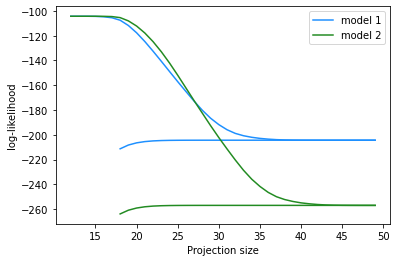

In [ ]:
f,ax = plt.subplots()
ax.plot(projections, lower_1,'dodgerblue',label='model 1')
ax.plot(projections, upper_1, 'dodgerblue')
ax.plot(projections, lower_2,'forestgreen',label='model 2')
ax.plot(projections, upper_2, 'forestgreen')
ax.set_xlabel('Projection size')
ax.set_ylabel('log-likelihood')
ax.legend()

In [ ]:
class errorDistributionAlgorithm:
    '''
    A code to compute the upper bound on the likelihood.
    '''
    def __init__(self,Pfsp,data,epsilon):
        self.Pfsp = Pfsp
        self.Pfsp_for_rank = Pfsp + 1e-10
        self.data = data
        self.alpha = epsilon
        self.getRanked()
        
    def getRanked(self):
        diff = np.sort(self.data/self.Pfsp_for_rank)
        inds = np.argsort(self.data/self.Pfsp_for_rank)
        inds = inds[::-1]
        self.diff = diff[::-1]
        self.rdata = self.data[inds]
        self.rPfsp = self.Pfsp[inds]
        self.inverseInds = np.argsort(inds)
      
    def solveEps(self,N):
        d0 = self.rdata[1:N]; d1 = self.rdata[:N-1];
        d0 = np.append(d0,0)
        mat = np.diag(d0,k=0)+np.diag(-d1,k=1)
        mat[-1,:] = np.ones(N)        
        RHS = np.zeros(N)
        RHS[-1] = self.alpha
        for i in range(N-1):
            RHS[i] = self.rdata[i]*self.rPfsp[i+1] - self.rdata[i+1]*self.rPfsp[i]
        eps_vec = np.linalg.solve(mat,RHS)
        return eps_vec
        
    def algorithm(self):
        N=1
        non_negative=True
        while non_negative is True and N<=(len(self.Pfsp)): 
            v = self.solveEps(N)
            if len(v[v<0])!=0:
                non_negative=False
                N-=1
                v = self.solveEps(N)
            elif N == len(self.Pfsp):
                non_negative = False
                v = self.solveEps(N)
            else:
                N+=1    
        eps_vec = np.zeros(len(self.rdata))
        eps_vec[:N] = v
        return eps_vec[self.inverseInds]

    def get_upper_bound(self):
        eps_vec = self.algorithm()
        pfull = self.Pfsp+eps_vec
        print(len(eps_vec))
        return np.dot(self.data,np.log(pfull))
         
class getBounds:
    '''
    This is a class to get the lower and upper bounds on likelihood 
    of a probability density with a given amount of error. The lower 
    bound is easily computed, just don't add any error back. The upper bound
    must be found using a water filling algorithm, which is implemented here. 
    '''
    def __init__(self,data,P_FSP,error):
        self.data = data
        self.Pd = data/float(np.sum(data))
        self.Pfsp = np.copy(P_FSP)
        self.eps = error
        numDim = len(P_FSP.shape)
        if np.sum(self.Pfsp)>1.0 or self.eps<=0.0:
            self.Pfsp = self.Pfsp/np.sum(self.Pfsp)
            self.eps = 0.0
        if numDim > 1:
            '''matrix versions'''
            self.Pfsp_copy = self.Pfsp
            self.support = np.nonzero(self.data)
            self.Pfsp = self.Pfsp[self.support].ravel()
            self.data = self.data[self.support].ravel()
        else:
            if len(self.data)>len(self.Pfsp):
                new = np.zeros(len(self.data))
                new[:len(self.Pfsp)] = self.Pfsp
                self.Pfsp = new
                self.Pfsp_copy = new
#            
            elif len(self.data)<=len(self.Pfsp):
                new = np.zeros(len(self.Pfsp))
                new[:len(self.data)] = self.data
                self.data = new
                
            self.Pfsp_copy = self.Pfsp
            self.support = np.nonzero(self.data)
            self.Pfsp = self.Pfsp[self.support]
            self.data = self.data[self.support]
        self.algorithm = errorDistributionAlgorithm(self.Pfsp,self.data,self.eps)
        
        
    def likelihood(self,x_star):
        '''
        return loglikelihood of data given the model.
        '''
        lhood = np.sum(self.data*(np.log10(self.Pfsp+x_star)))
        return lhood
        
    def lowerBound(self):
        '''
        return lowerbound on loglikelihood
        '''
        return self.likelihood(0)
   
    def upperBound(self):
        '''
        calculate x_star and return the upper bound of likelihood 
        on the data given the model. 
        '''
        self.x_star_raw = self.algorithm.algorithm()
        star_soln_raw = self.Pfsp+self.x_star_raw
        self.star_soln = self.Pfsp_copy
        self.star_soln[self.support] = star_soln_raw
        return self.likelihood(self.x_star_raw)